# 자연어 처리 개요

#### 형태소 분석: 토큰 분리, 어간 추출, 품사 부착, 색인, 벡터화
#### 구문 분석: 문장 경계 인식, 구문 분석, 공기어, 개체명 사전 구축(PLOT, 수치, 외국어 한글표기), 개체명 인식 
#### 의미 분석: 대용어 해소(대명사, 두문자어, 약어, 수치), 의미 중의성 해결(동명이인, 이명동인)
#### 담론 분석: 분류, 군집, 중복, 요약, 가중치, 순위화, 토픽 모델링, 이슈 트래킹, 평판 분석, 감성분석, 복합논증 분석

---

# Text Mining
- 엄밀히 말하자면 NLP와는 다르다.
- 자연어를 처리하기 위해 의미있는 단어만 뽑는 행위.

---

# NLTK
- 전 세계적으로 가장 많이 사용하는 NLP library
- python NLP 계의 scikit 같은 존재
- 단, 한글은 지원이 안된다.

In [ ]:
# install이 안되어 있다면 아래 코드를 실행

# !pip install nltk

In [7]:
import nltk
nltk.download("brown") # 가장 보편적으로 성능 체크하는 corpus(말뭉치)
nltk.download("gutenberg") # 저작권이 종료된 작품이 다수 수록됨
nltk.download("punkt") # 구둣점 데이터
nltk.download("stopwords") # 불용어 데이터

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\JINHYO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\JINHYO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JINHYO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JINHYO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### corpus 불러오기

In [9]:
from nltk.corpus import brown, gutenberg
len(brown.fileids()), brown.fileids()[0]
# corpus = brown.open(brown.fileids()[0]).read()

(500, 'ca01')

In [13]:
corpus = gutenberg.open(gutenberg.fileids()[0]).read()

In [14]:
# 개행으로 corpus를 나눈 것이다.
# line으로 쪼갠 것이 곧 문장은 아니다.

len(corpus.splitlines())

16823

In [15]:
# .(마침표)를 기준으로 쪼갠 것이다.
# 개행으로 나눈 것보다는 많다.
# .으로 쪼갠 것이 곧 문장은 아니다.

len(corpus.split())

158167

#### sent_tokenizer
- 말뭉치를 문장으로 나누어준다.
- 문장 분류는 구둣점을 기반으로 한다.

In [17]:
# 문장으로 나누어주는 sent_tokenize를 써보니까 갯수가 위의 2개에 비해서 훨씬 줄었다.
# sent_tokenize는 구둣점을 기반으로 쪼갠다.
# punkt를 먼저 다운로드해둬야 사용할 수 있다.

from nltk.tokenize import sent_tokenize
sentence = sent_tokenize(corpus)
len(sentence), sentence[0]

(7493,
 '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.')

In [20]:
# nltk는 한국어를 지원하지 않지만, 구둣점은 만국이 비슷하게 사용하고 있으므로,한글에도 쓸 수는 있다.

text = """
2047년에는 한 집 건너 한 집에 할머니와 할아버지가 살게 된다. 65세 이상 고령자 가구가 젠체의 49.6% 차지하기 때문이다. 2017년 1인 가구는 30대(17.4%)가 가장 큰 비중을 차지했지만, 2047년에는 70대(21.8%)가 가장 큰 비중으로 올라선다. 국내 가구 수는 2040년 정점을 찍은 뒤 2041년부터 줄어들 전망이다."""
len(sent_tokenize(text)), sent_tokenize(text)

(4,
 ['\n2047년에는 한 집 건너 한 집에 할머니와 할아버지가 살게 된다.',
  '65세 이상 고령자 가구가 젠체의 49.6% 차지하기 때문이다.',
  '2017년 1인 가구는 30대(17.4%)가 가장 큰 비중을 차지했지만, 2047년에는 70대(21.8%)가 가장 큰 비중으로 올라선다.',
  '국내 가구 수는 2040년 정점을 찍은 뒤 2041년부터 줄어들 전망이다.'])

In [21]:
# .을 ?로 바꾸어도 동일하게 4개로 나눠준다.
# .이나 ?나 구두점이기 때문이다.

len(sent_tokenize(text.replace(".", "?")))

4

In [22]:
# 구둣점이 연속되면 맨 마지막 하나만 구둣점으로 인식한다.

sent_tokenize("성소는 우주소녀의 멤버??!!!!!???!")

['성소는 우주소녀의 멤버??!!!!!???', '!']

In [27]:
import re
re.search(r"[\.\!\?]", "성소는 우주소녀의 멤버??!!!!!???!"[12:])

<re.Match object; span=(0, 1), match='?'>

#### word_tokenizer
- 단어를 기준으로 나눈다.
- 단순히 공백을 단어로 하는 것은 아니다.
- 의미 있는 부분만 단어로 인식한다. 

In [30]:
# python 내장기능 split을 쓰는것과 tokenizer를 쓰는 것은 다른 결과를 보여준다.

from nltk.tokenize import word_tokenize
len(text.split()), len(word_tokenize(text))

(42, 58)

In [31]:
"성소는 '우주소녀'의 멤버인가요?".split()

['성소는', "'우주소녀'의", '멤버인가요?']

In [32]:
word_tokenize("성소는 '우주소녀'의 멤버인가요?")

['성소는', "'우주소녀", "'", '의', '멤버인가요', '?']

> word_tokenize는 split()과 다르다.
>
> 의미가 있는 단어 를 기준으로 쪼갠다.
>
> 의미가 있다고 생각하는 것은 다 단어로 취급해서 나눈다.
>
>    - 붙어 있는 문자라고 하더라도, 의미가 있다고 판단하면 나눈다.

In [33]:
word_tokenize("성소는 '우주소녀'의 멤버인가요?")

['성소는', "'우주소녀", "'", '의', '멤버인가요', '?']

In [37]:
word_tokenize('성소는 "우주소녀"의 멤버인가요?')

['성소는', '``', '우주소녀', "''", '의', '멤버인가요', '?']

In [38]:
word_tokenize("이것은 문장입니다. 이것은 문장입니다."), \
word_tokenize("이것은 문장입니다. 이것은 문장입니다.", preserve_line=True)

(['이것은', '문장입니다', '.', '이것은', '문장입니다', '.'],
 ['이것은', '문장입니다.', '이것은', '문장입니다', '.'])

#### TweetTokenizer
- SNS 데이터 전용 tokenizer

In [39]:
# 영미권에서 사용하는 이모티콘을 tokenize하면?

word_tokenize("=(, =), ;)")

['=', '(', ',', '=', ')', ',', ';', ')']

> 특수기호로 만든 이모티콘을 구두점이라고 판단하고 다 잘게 잘라버렸다.
>
> 그러나 SNS 데이터를 분석할때는 이런 이모티콘들이 의미를 갖기 때문에 남겨둬야한다.
>
> TweetTokenizer도 있다.

In [40]:
from nltk.tokenize import TweetTokenizer

# 이모티콘을 남겼다.
# 영미권 SNS 데이터 tokenize하기 좋다.
TweetTokenizer().tokenize("성소가 너무 좋아요 =), =(, ;)")

['성소가', '너무', '좋아요', '=)', ',', '=(', ',', ';)']

#### regexp_tokenize
- 정규식을 기반으로 한 tokenizer

In [43]:
from nltk.tokenize import regexp_tokenize

# 정규식으로 만드는 tokenize

regexp_tokenize("성소가 너무 좋아요 =), =(, ;)", r"\b(\w+)\b")

['성소가', '너무', '좋아요']

In [44]:
# 자음 반복만 걸러낼 수도 있다.

regexp_tokenize("가^나 2019년 성소가 너무 좋아요 ㅋㅋㅋㅋ =), =(, ;)", 
                r"\b([ㄱ-ㅎ]{4,})\b")

['ㅋㅋㅋㅋ']

In [45]:
# 의미없이 반복되는 자음을 정규식으로 없앨 수 있다.
# 전처리

re.sub(r"\b([ㄱ-ㅎ]{4,})\b",
      " ",
      "가^나 2019년 성소가 너무 좋아요 ㅋㅋㅋㅋ =), =(, ;)")

'가^나 2019년 성소가 너무 좋아요   =), =(, ;)'

---

### 어제 수집한 news 데이터에서 뉴스 본문 이외의 code 설명 줄을 정규식으로 삭제하는 전처리를 연습해보자.

In [50]:
import os 
with open("practice/8일차_실습_project/헤드라인/"+os.listdir("practice/8일차_실습_project/헤드라인")[0], encoding="utf-8") as fp:
    news = fp.read()

In [52]:
# 간단하게 맛보기 수준으로 함.
# 이렇게 해서 코드는 지웠지만, 이메일 주소와 같이 영문으로 된 본문 내용도 삭제되었다.
# 이메일을 정규식으로 만들어서 보존 시키면 된다. => 전처리하는 순서도 중요하다
# 

re.sub(r"\b[A-Za-z_ ()]{5,}\b", " ", news)

'//  오류를 우회하기 위한 함수 추가\n () {}\n\n 및 .국내 동영상스트리밍서비스 시장을 둘러싼 싸움이 대전으로 번지고 있다. 지상파 방송 3사(KBSㆍMBCㆍSBS)와 거대 통신사 SK텔레콤이 합작 웨이브의 출범(18일)을 알리자마자 국내 대표 케이블채널 사업자인 CJ ENM과 JTBC가 합작 설립을 발표했다. OTT를 중심으로 한 국내 방송업계 재편이 급물살을 타게 됐다.CJ ENM과 JTBC는 통합 합작법인을 내년 초까지 출범시키겠다는 내용의 양해각서 를 체결했다고 17일 밝혔다. 합작법인은 CJ ENM이 1대 주주이며, JTBC가 2대 주주로 참여한다. 통합 OTT는 CJ ENM이 운영하는 티빙을 기반으로 이뤄질 예정이다. CJ ENM은 인기 케이블채널 tvN과 OCN, 엠넷 등을 보유하고 있는 방송업계 강자다. JTBC는 종합편성(종편) 채널 중 매출액이 가장 높은 방송시장의 신흥 강호다.CJ ENM과 JTBC의 통합 설립 논의는 지난해부터 이뤄졌다. 세계 최대 OTT인 넷플릭스가 지난해부터 드라마 ‘킹덤’ 등 국내 콘텐츠 투자에 본격적으로 나서면서부터다. 픽사와 마블 등을 거린 월트 디즈니의 디즈니플러스가 내년 한국 진출을 예고한 점도 두 회사의 연합을 재촉했다. CJ ENM과 JTBC는 ‘미스터 션샤인’과 ‘스카이캐슬’ 등 자사 인기 콘텐츠의 판권을 넷플릭스에 판매하는 식으로 OTT시장에 진출하는 전략을 취해 왔었다. 국내 동영상 시장이 위주로 급속히 재편되자 합작 법인 설립으로 전략을 급선회하게 됐다. 웨이브의 출범도 두 회사의 ‘동맹’에 큰 영향을 준 것으로 보인다.  관계자는 “방송ㆍ영상 사업은 속도를 가늠하기 어려울 정도로 빠르게 변화하고 있다”며 “결국 차별화된 콘텐츠를 끊임없이 생산할 뿐만 아니라, 적절히 유통할 수 이는 시스템 구축이 필수적“이라고 밝혔다.두 회사는 콘텐츠에서 상대적 우위를 차지하고 있다. CJ ENM은 시가총액 1억9,000억원대인 국내 최대 드라마 제작사 스튜디오드래곤을 자회사로 두고 있다. 예능프로그램 

---

# 영어 형태소 분석기
- 우리는 안 쓸 것이니 간단히 보자

In [54]:
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\JINHYO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [55]:
# token들을 넣으면, 품사를 매칭해준다.

pos_tag(word_tokenize(sentence[0]))

[('[', 'NNS'),
 ('Emma', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty-one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP'),
 ('.', '.')

In [57]:
from nltk.help import upenn_tagset
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\JINHYO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping help\tagsets.zip.


True

In [58]:
# 품사 설명

upenn_tagset("NNP")

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


---

# tokenizer의 중요성

In [72]:
from nltk import Text

In [62]:
# word_tokenizer를 이용해서 분석

text = Text(word_tokenize(corpus), name="Emma")

In [64]:
# Text 인스턴스의 첫 줄은 name이다.

text

<Text: Emma>

In [63]:
# N은 전체 token의 수
# B는 unique한 token의 수

text.vocab().N(), text.vocab().B()

(191785, 8406)

> 해석: word_tokenize로 분석해보니, 총 191785개의 단어(token)으로 구성된 소설이지만, 실제 사용된 단어의 갯수는 8046개이다.

In [67]:
# pos_tag를 이용해서 분석

ttext = Text(["/".join(_) for _ in pos_tag(word_tokenize(corpus))],
            name="Tagged Emma")

In [66]:
# 단어와 품사를 하나로 합쳐주었다.

"/".join(pos_tag(word_tokenize("Life is too short."))[0])

'Life/NNP'

In [69]:
# pos_tag를 이용해서 분석

ttext.vocab().N(), ttext.vocab().B()

(191785, 10974)

> pos_tag는 문법적 특성을 포함해서 toeknize한다.
>
> 동일한 단어라도, 품사가 다르면 다른 단어로 분류했을 것이다.
>
> 고로, word_tokenize와 단어의 총 갯수는 같지만, unique한 단어의 갯수는 더 늘어났다.
>
> 해석: pos_tag로 분석해보니, 총 191785개의 단어(token)으로 구성된 소설이지만, 실제 사용된 단어(문법적 특성을 고려)의 갯수는 10974개이다.

In [71]:
# python 자체 split 기능을 통한 분석

len(corpus.split()), len(set(corpus.split()))

(158167, 17409)

> python 자체 기능을 이용해서 단어를 쪼개보니 tokenizer를 썼을 때보다 전체 단어수가 적다 => 세밀하지 못하다.
>
> unique한 단어의 수가 tokenizer를 썼을 때보다 많다 => 통계적으로 봤을때, 확률을 내기에 불리하다.
>
> 그러므로, tokenizer가 중요하다.

---

# zipf's law
- 수식으로 증명되지는 않았지만, 경험적으로 증명된 법칙
- 단어의 빈도수 그래프와, 순위의 역순 그래프는 일치한다.

In [73]:
import matplotlib.pyplot as plt

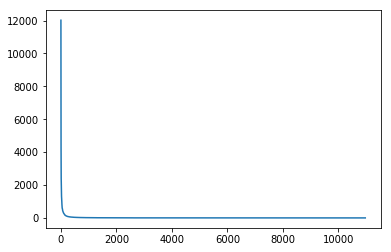

In [100]:
# 빈도수 그래프

plt.plot([_[1] for _ in sorted(ttext.vocab().items(), key=lambda x: x[1], reverse=True)]) # 빈도순대로 정렬

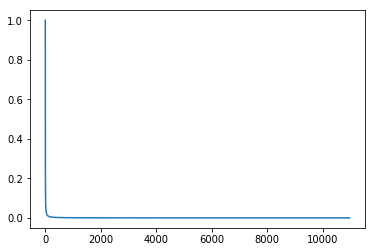

In [99]:
# 순위의 역순 그래프

plt.plot([1/_ for _ in range(1,ttext.vocab().B())])

---

# koNLpy

- 한글로 된 형태소 분석 라이브러리. 
- 무료이고 잘 만들었다. (이 전까지는 대학연구기관에서 유료로 대여했어야 했다.)
- 설치방법: http://bitly.kr/85NpbM

In [3]:
from konlpy.tag import Kkma

In [6]:
Kkma().pos("우주소녀의 멤버는 성소이다.")

[('우주', 'NNG'),
 ('소녀', 'NNG'),
 ('의', 'JKG'),
 ('멤버', 'NNG'),
 ('는', 'JX'),
 ('성소', 'NNG'),
 ('이', 'VCP'),
 ('다', 'EFN'),
 ('.', 'SF')]